In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../data/dataset/Life Expectancy Data.csv')

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [63]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [64]:
miss_idx = df[df.isna().any(axis=1)].index

df.iloc[miss_idx[0], :]

Country                               Algeria
Year                                     2015
Status                             Developing
Life expectancy                          75.6
Adult Mortality                          19.0
infant deaths                              21
Alcohol                                   NaN
percentage expenditure                    0.0
Hepatitis B                              95.0
Measles                                    63
 BMI                                     59.5
under-five deaths                          24
Polio                                    95.0
Total expenditure                         NaN
Diphtheria                               95.0
 HIV/AIDS                                 0.1
GDP                                4132.76292
Population                         39871528.0
 thinness  1-19 years                     6.0
 thinness 5-9 years                       5.8
Income composition of resources         0.743
Schooling                         

since there are a lot of missing values and just replacing them with the mean or median of that column is not a good idea, we will randomly replace them.

In [4]:
def fill_with_random(df):
    for col in df.columns:
        if df[col].isna().sum() > 0:
            df[col] = df[col].apply(lambda x: np.random.choice(df[col].dropna().values) if pd.isna(x) else x)
            
    return df

In [5]:
df = fill_with_random(df)
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [67]:
df.iloc[miss_idx[0], :]

Country                               Algeria
Year                                     2015
Status                             Developing
Life expectancy                          75.6
Adult Mortality                          19.0
infant deaths                              21
Alcohol                                   2.3
percentage expenditure                    0.0
Hepatitis B                              95.0
Measles                                    63
 BMI                                     59.5
under-five deaths                          24
Polio                                    95.0
Total expenditure                         9.1
Diphtheria                               95.0
 HIV/AIDS                                 0.1
GDP                                4132.76292
Population                         39871528.0
 thinness  1-19 years                     6.0
 thinness 5-9 years                       5.8
Income composition of resources         0.743
Schooling                         

In [68]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


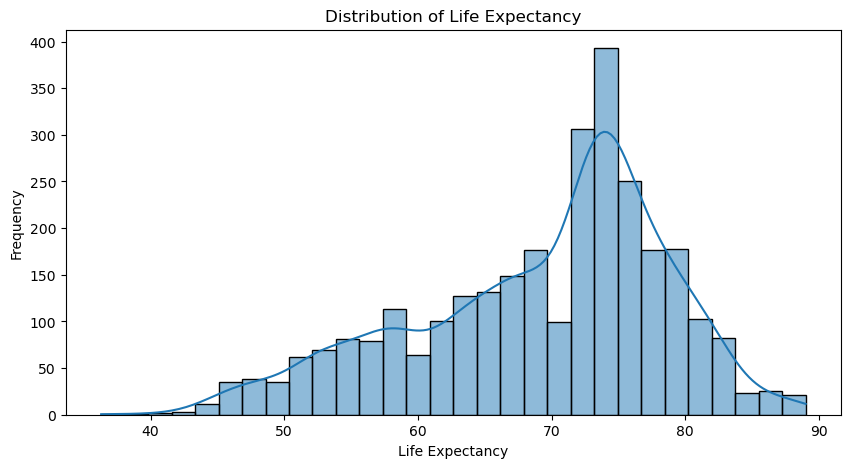

In [82]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Life expectancy '], bins=30, kde=True)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

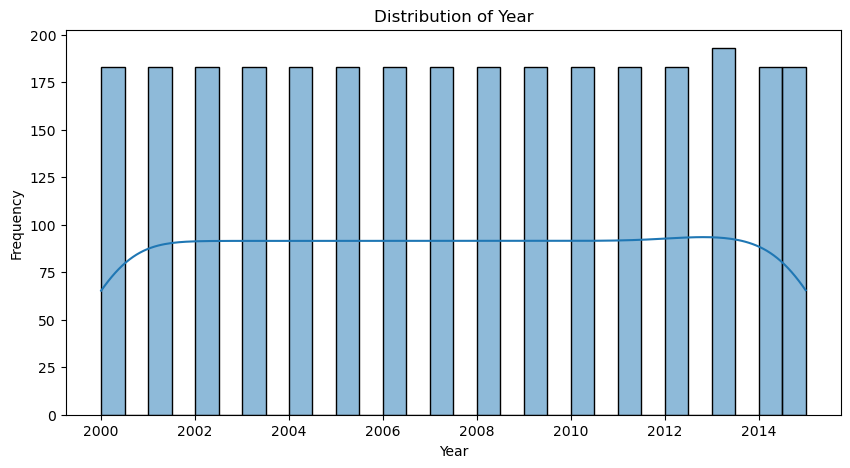

In [85]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Year'], bins=30, kde=True)
plt.title("Distribution of Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

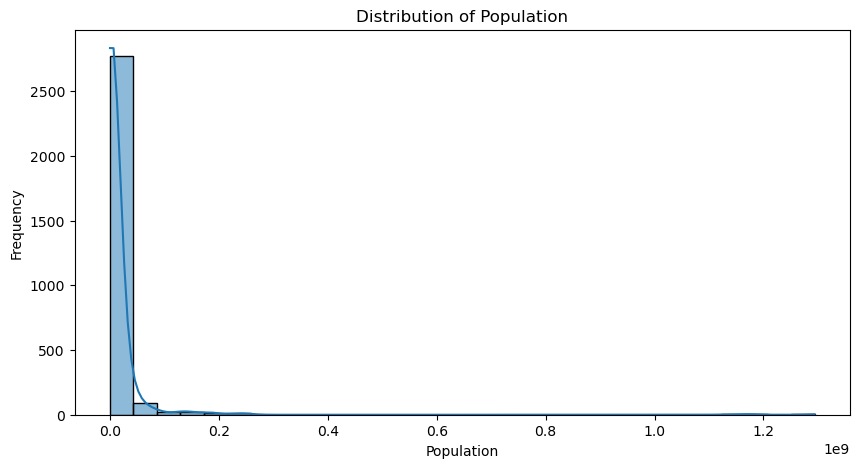

In [86]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Population'], bins=30, kde=True)
plt.title("Distribution of Population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

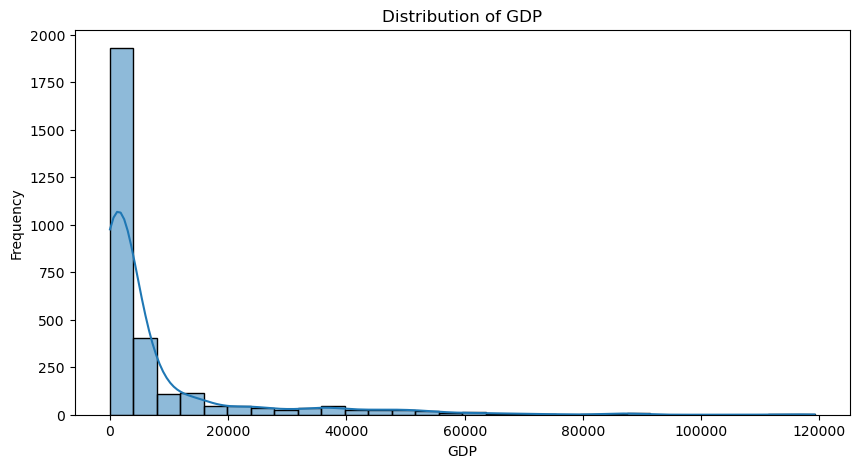

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(df['GDP'], bins=30, kde=True)
plt.title("Distribution of GDP")
plt.xlabel("GDP")
plt.ylabel("Frequency")
plt.show()

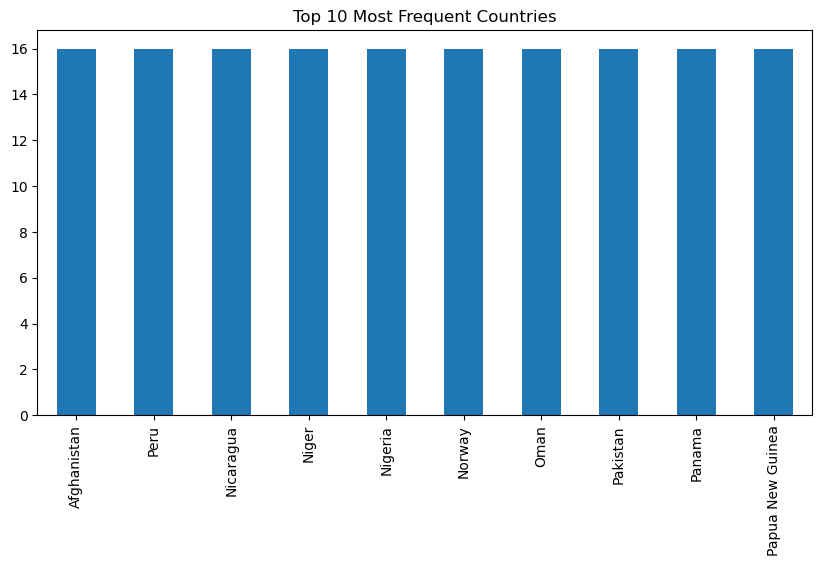

In [70]:
df['Country'].value_counts().head(10).plot(kind='bar', figsize=(10,5), title="Top 10 Most Frequent Countries")
plt.show()

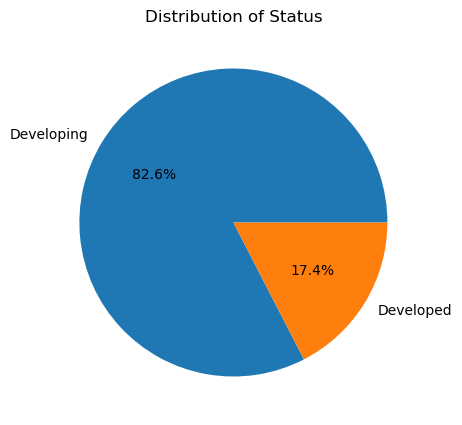

In [75]:
df['Status'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%1.1f%%', title="Distribution of Status")
plt.ylabel('')
plt.show()

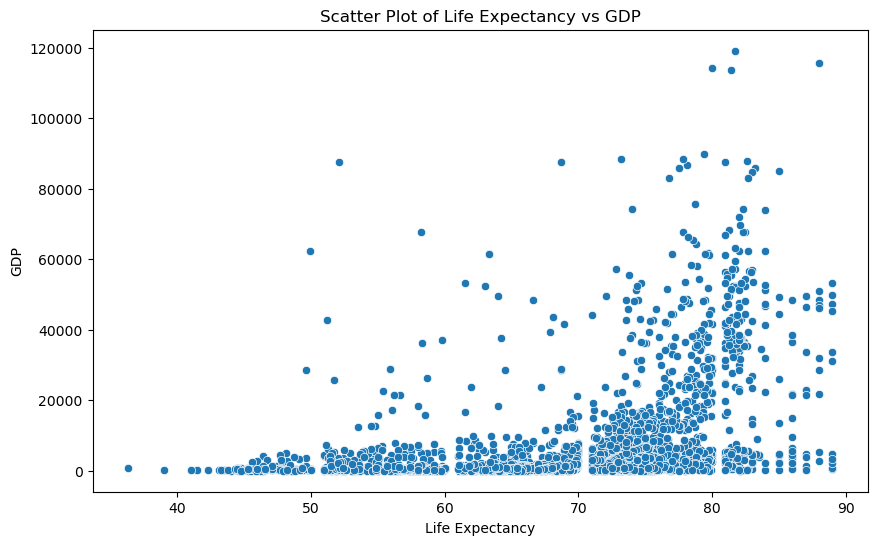

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Life expectancy '], y=df['GDP'])
plt.title("Scatter Plot of Life Expectancy vs GDP")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
plt.show()

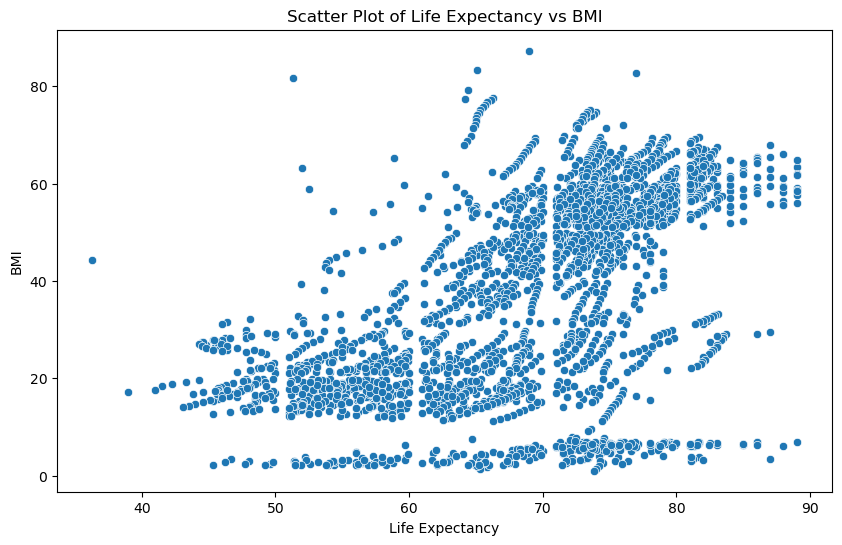

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Life expectancy '], y=df[' BMI '])
plt.title("Scatter Plot of Life Expectancy vs BMI")
plt.xlabel("Life Expectancy")
plt.ylabel("BMI")
plt.show()

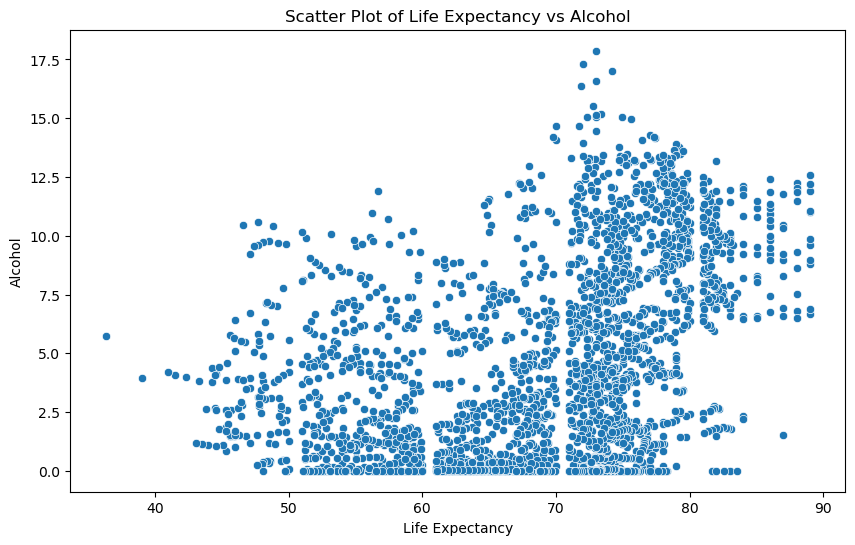

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Life expectancy '], y=df['Alcohol'])
plt.title("Scatter Plot of Life Expectancy vs Alcohol")
plt.xlabel("Life Expectancy")
plt.ylabel("Alcohol")
plt.show()

In [98]:
len(df['Country'].unique())

193

Since there are 193 unique values one-hot encoding isn't possible. So we will use LabelEncoder to convert the categorical data into numerical data. despite the fact that it might introduce ordinal relationship.

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Country']

0         0
1         0
2         0
3         0
4         0
       ... 
2933    192
2934    192
2935    192
2936    192
2937    192
Name: Country, Length: 2938, dtype: int32

In [53]:
len(df['Status'].unique())

2

But here we can easily use one-hot encoding since there are only two classes.

Developing: 1
Developed: 0

In [9]:
df = pd.get_dummies(df, columns=['Status'], drop_first=True)
df

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,0,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,0,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,0,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1
2934,192,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1
2935,192,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1
2936,192,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1


so we know what value is the normalized 2010 after transformation:

In [56]:
mx, mn = df['Year'].max(), df['Year'].min()

split_point = (2010 - mn) / (mx - mn)
split_point

0.6666666666666666

Normalize data

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.head()


,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,0.0,1.000000,0.544592,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,0.209733,...,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,1.0
1,0.0,0.933333,0.447818,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,0.203940,...,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,1.0
2,0.0,0.866667,0.447818,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,0.198146,...,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261,1.0
3,0.0,0.800000,0.440228,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,0.192352,...,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430,1.0
4,0.0,0.733333,0.434535,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,0.187717,...,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937,1.0


In [58]:
df_train = df[df['Year'] <= split_point]
df_test = df[df['Year'] > split_point]

df_train

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
5,0.0,0.666667,0.426945,0.385042,0.041111,0.000000,0.004090,0.663265,0.009374,0.181924,...,0.512478,0.659794,0.000000,0.004629,0.002228,0.663043,0.642105,0.472574,0.444444,1.0
6,0.0,0.600000,0.423150,0.387812,0.042778,0.000000,0.002914,0.632653,0.013484,0.176130,...,0.525247,0.628866,0.000000,0.003728,0.000220,0.670290,0.652632,0.457806,0.429952,1.0
7,0.0,0.533333,0.413662,0.396122,0.044444,0.001120,0.001328,0.642857,0.007536,0.170336,...,0.461985,0.639175,0.000000,0.003119,0.002110,0.677536,0.659649,0.456751,0.420290,1.0
8,0.0,0.466667,0.402277,0.407202,0.045556,0.000560,0.000560,0.632653,0.005377,0.164542,...,0.369124,0.628866,0.000000,0.003089,0.020572,0.684783,0.666667,0.437764,0.405797,1.0
9,0.0,0.400000,0.398482,0.407202,0.046667,0.001120,0.000881,0.642857,0.009379,0.158749,...,0.409750,0.577320,0.000000,0.002273,0.002001,0.692029,0.673684,0.427215,0.391304,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,0.266667,0.151803,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,...,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444,1.0
2934,1.0,0.200000,0.155598,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,...,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937,1.0
2935,1.0,0.133333,0.161290,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,...,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092,1.0
2936,1.0,0.066667,0.170778,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,...,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430,1.0


In [60]:
df_test

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,0.0,1.000000,0.544592,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,...,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,1.0
1,0.0,0.933333,0.447818,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,...,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,1.0
2,0.0,0.866667,0.447818,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,...,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261,1.0
3,0.0,0.800000,0.440228,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,...,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430,1.0
4,0.0,0.733333,0.434535,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,...,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,1.0,1.000000,0.582543,0.463989,0.012222,0.280515,0.000000,0.877551,0.000000,0.356895,...,0.470110,0.876289,0.120792,0.000982,0.012194,0.199275,0.189474,0.534810,0.497585,1.0
2923,1.0,0.933333,0.434535,0.512465,0.012778,0.363382,0.000556,0.918367,0.000000,0.351101,...,0.352293,0.917526,0.122772,0.001056,0.011911,0.210145,0.196491,0.525316,0.497585,1.0
2924,1.0,0.866667,0.411765,0.551247,0.013889,0.357223,0.000548,0.959184,0.000000,0.032445,...,0.377829,0.958763,0.132673,0.000919,0.000120,0.221014,0.207018,0.514768,0.502415,1.0
2925,1.0,0.800000,0.385199,0.592798,0.014444,0.340426,0.004754,0.979592,0.000000,0.026651,...,0.366802,0.958763,0.172277,0.008005,0.001138,0.231884,0.221053,0.489451,0.473430,1.0
